<a href="https://colab.research.google.com/github/Rachit23110261/ML_ASSIGNMENT_2_23110261_23110189_23110306/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

In [ ]:
import os

In [ ]:
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg

dog.jpg exists


torch.Size([3, 1365, 2048])


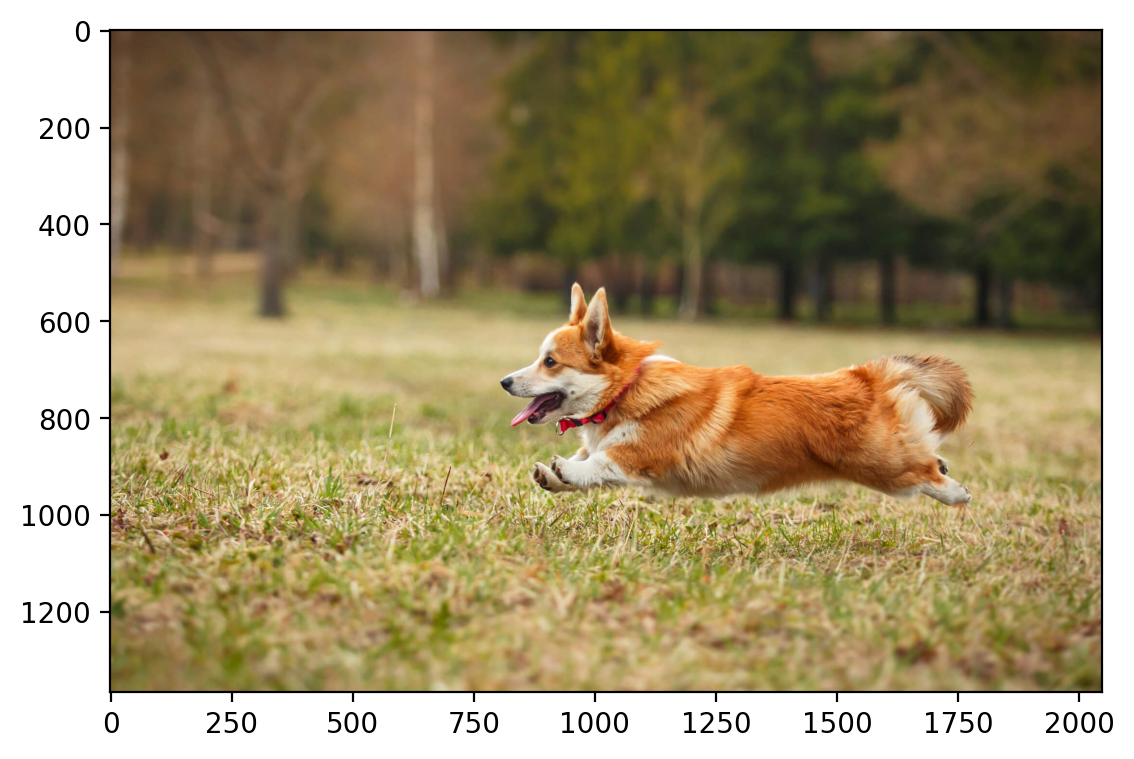

In [ ]:
img = torchvision.io.read_image("dog.jpg")
print(img.shape)
torch.Size([3, 1365, 2048])
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [ ]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img

MinMaxScaler()

In [ ]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape

img_scaled = torch.tensor(img_scaled)

In [ ]:
img_scaled = img_scaled.to(device)
img_scaled

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

In [ ]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 600, 800, 300, 300)
crop.shape

torch.Size([3, 300, 300])

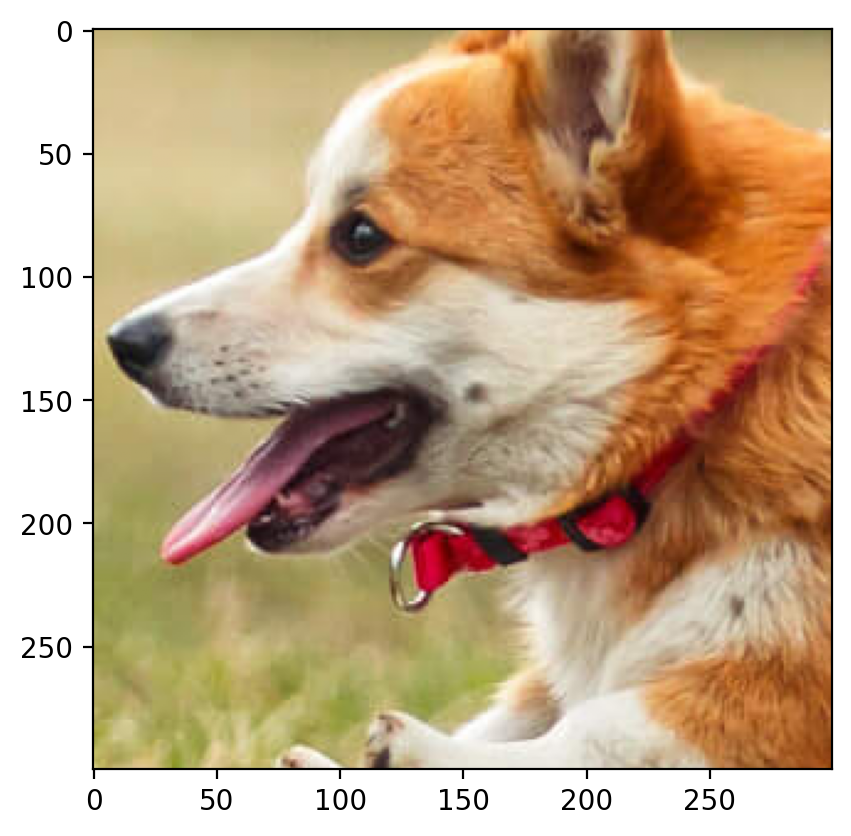

In [ ]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [ ]:
crop = crop.to(device)

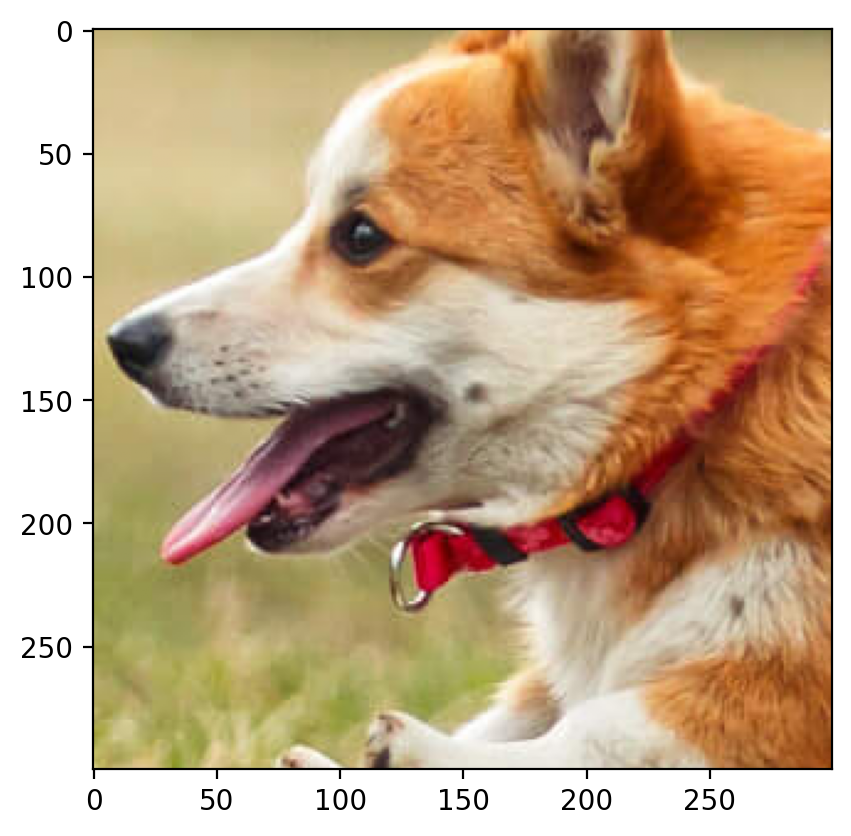

In [ ]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [ ]:
crop

tensor([[[0.7686, 0.7686, 0.7686,  ..., 0.5451, 0.5451, 0.5412],
         [0.7725, 0.7725, 0.7725,  ..., 0.5686, 0.5686, 0.5647],
         [0.7765, 0.7765, 0.7765,  ..., 0.5882, 0.5843, 0.5843],
         ...,
         [0.7961, 0.7373, 0.7176,  ..., 0.5843, 0.5725, 0.5490],
         [0.8471, 0.7843, 0.7451,  ..., 0.6039, 0.5686, 0.5569],
         [0.8784, 0.8196, 0.7686,  ..., 0.6275, 0.5804, 0.5686]],

        [[0.6941, 0.6941, 0.6941,  ..., 0.5137, 0.5137, 0.5098],
         [0.6980, 0.6980, 0.6980,  ..., 0.5255, 0.5255, 0.5216],
         [0.7020, 0.7020, 0.7020,  ..., 0.5451, 0.5412, 0.5412],
         ...,
         [0.7686, 0.7098, 0.6863,  ..., 0.2824, 0.2706, 0.2431],
         [0.8157, 0.7569, 0.7137,  ..., 0.3059, 0.2667, 0.2431],
         [0.8431, 0.7882, 0.7333,  ..., 0.3294, 0.2706, 0.2588]],

        [[0.4745, 0.4745, 0.4745,  ..., 0.3294, 0.3294, 0.3255],
         [0.4784, 0.4784, 0.4784,  ..., 0.3451, 0.3451, 0.3412],
         [0.4824, 0.4824, 0.4824,  ..., 0.3647, 0.3608, 0.

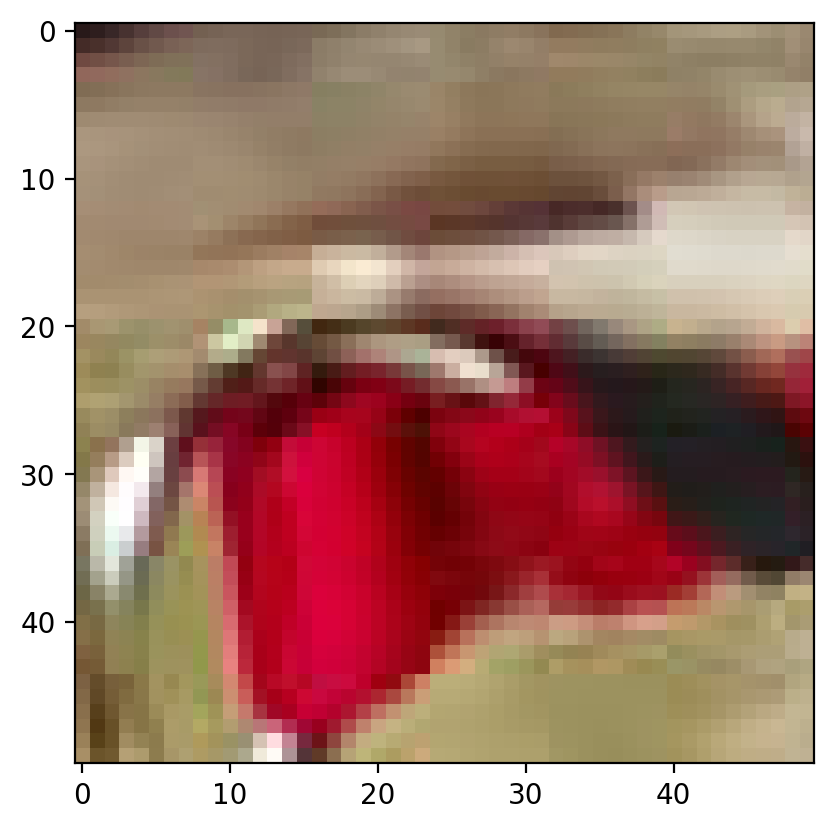

In [ ]:
r = crop[:,180:230,120:170]
plt.imshow(rearrange(r, 'c h w -> h w c').cpu().numpy())

In [ ]:
r.shape

torch.Size([3, 50, 50])

In [ ]:
r
new_arr = r.reshape(-1,r.shape[-1])
new_arr

tensor([[0.1608, 0.1804, 0.2235,  ..., 0.6118, 0.6431, 0.6039],
        [0.2667, 0.2863, 0.3216,  ..., 0.5686, 0.6314, 0.5961],
        [0.4353, 0.4431, 0.4627,  ..., 0.5608, 0.6039, 0.5804],
        ...,
        [0.3137, 0.0745, 0.1529,  ..., 0.5765, 0.5725, 0.5569],
        [0.3490, 0.0941, 0.1529,  ..., 0.5647, 0.5686, 0.5529],
        [0.4000, 0.1647, 0.1843,  ..., 0.5373, 0.5765, 0.5804]],
       dtype=torch.float64)

In [ ]:
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix A into W and H
    A: input matrix of size (n_users, n_movies)
    k: number of latent features

    Returns W and H
    W: matrix of size (n_users, k)
    H: matrix of size (k, n_movies)
    """
    A = A.to(device)
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

    optimizer = optim.Adam([W, H], lr=0.01)

    for i in range(1000):
        loss = torch.norm(torch.mm(W, H) - A)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    return W, H, loss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

def compute_rmse(original, reconstructed):
    """Compute the Root Mean Square Error between the original and reconstructed images."""
    return torch.sqrt(((original - reconstructed) ** 2).mean()).item()

def compute_psnr(original, reconstructed, max_pixel_value=1.0):
    """Compute the Peak Signal-to-Noise Ratio between the original and reconstructed images."""
    mse = torch.mean((original - reconstructed) ** 2).item()
    if mse == 0:
        return float('inf')
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [ ]:
def compress_and_reconstruct(cropped,original_array, ranks, device=torch.device("cpu")):
    flattened_patch = original_array.reshape(-1, original_array.shape[-1])

    for r in ranks:
        print(f"\nLow-rank approximation with r = {r}")

        W, H, loss = factorize(flattened_patch, r, device)
        reconstructed_patch = torch.mm(W, H)
        new_array = reconstructed_patch.reshape(3, 50, 50).detach()
        new_array = new_array - new_array.min()  # Ensure the minimum value is 0
        new_array = new_array / new_array.max()  # Normalize to [0, 1]

        fig, axes = plt.subplots(1, 4, figsize=(30, 5))
        rmse = compute_rmse(original_array, new_array)
        psnr = compute_psnr(original_array, new_array)

        print(f"RMSE for r = {r}: {rmse:.4f}")
        print(f"PSNR for r = {r}: {psnr:.2f} dB")

        axes[0].imshow(rearrange(original_array, 'c h w -> h w c').cpu().numpy())
        axes[0].set_title("Original Patch")

        axes[1].imshow(rearrange(new_array, 'c h w -> h w c').numpy())
        axes[1].set_title(f"Reconstructed Patch - r={r}")
        axes[2].imshow(rearrange(cropped, 'c h w -> h w c').cpu().numpy())
        axes[2].set_title("Original Image")
        z = cropped
        z[:,180:230,120:170] = new_array
        axes[3].imshow(rearrange(z, 'c h w -> h w c').cpu().numpy())
        axes[3].set_title(f"Reconstructed Image - r={r}")

        plt.show()


Low-rank approximation with r = 5
RMSE for r = 5: 0.0649
PSNR for r = 5: 23.75 dB


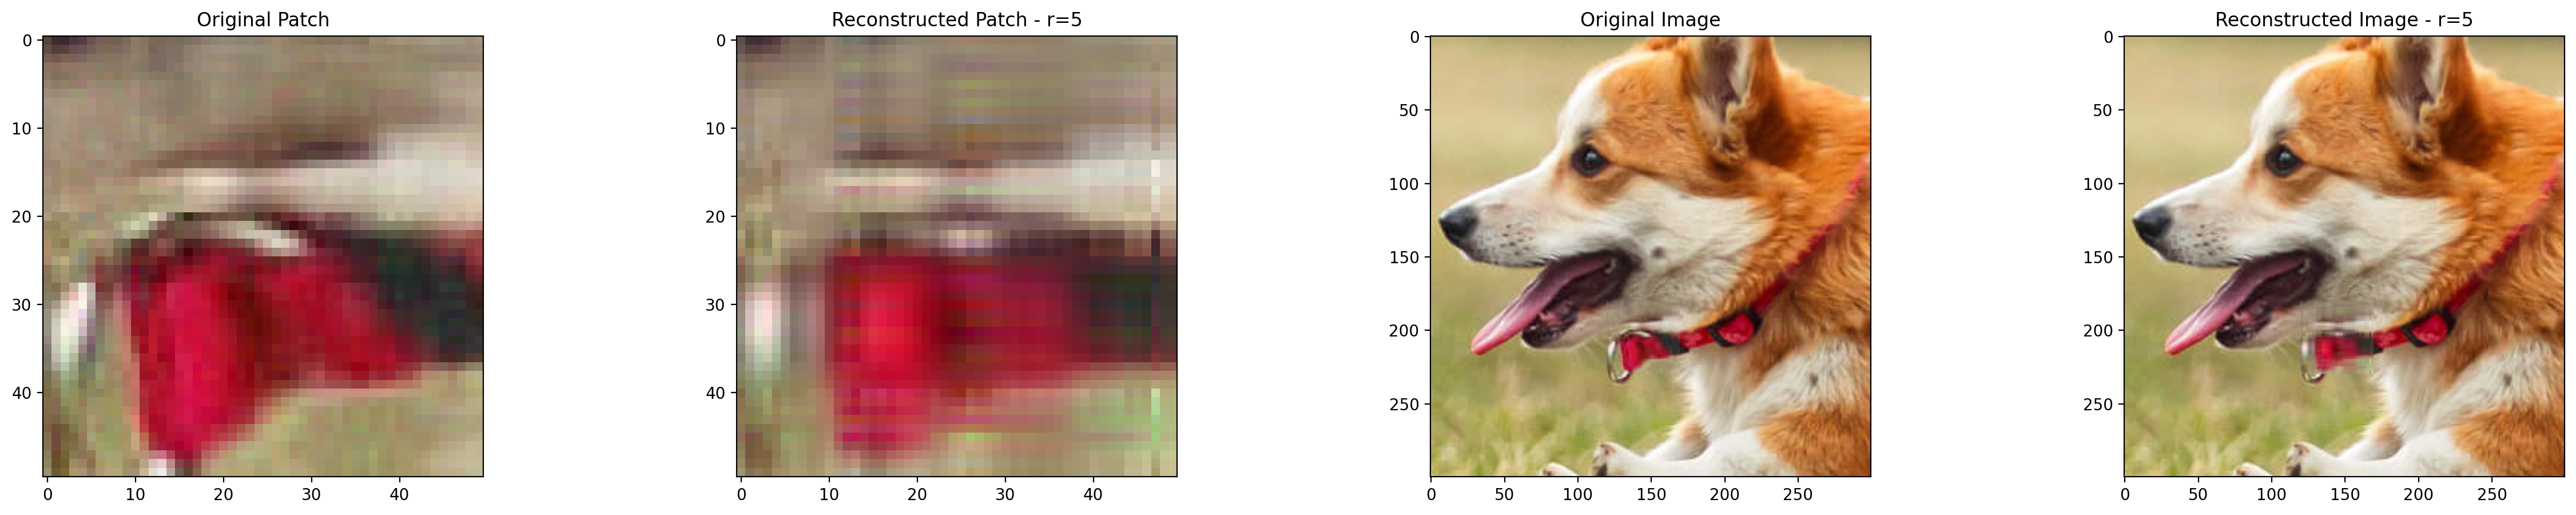


Low-rank approximation with r = 10
RMSE for r = 10: 0.0559
PSNR for r = 10: 25.05 dB


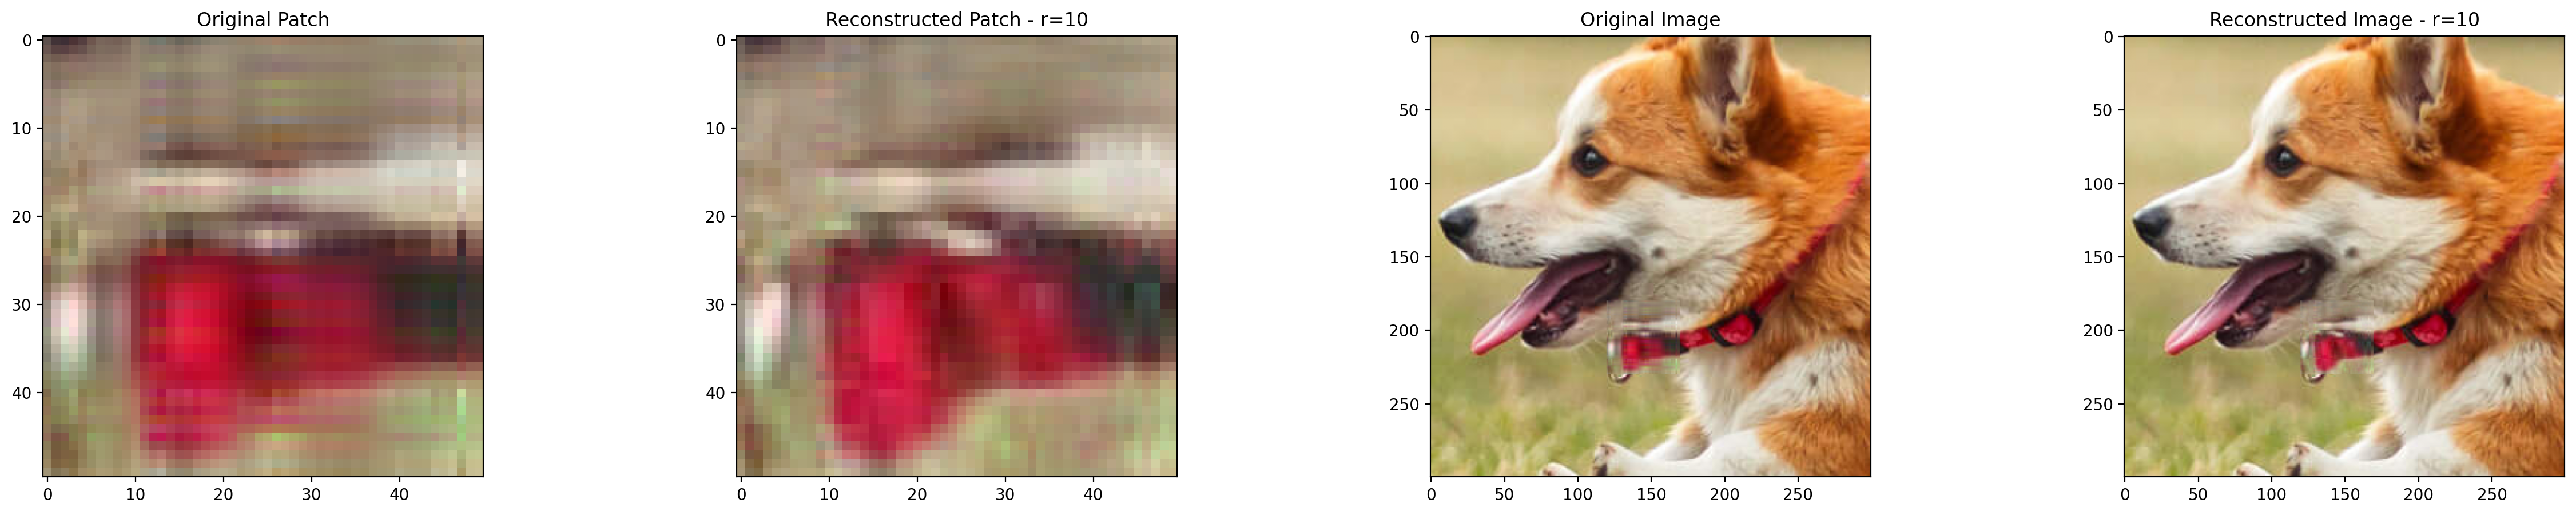


Low-rank approximation with r = 15
RMSE for r = 15: 0.0445
PSNR for r = 15: 27.03 dB


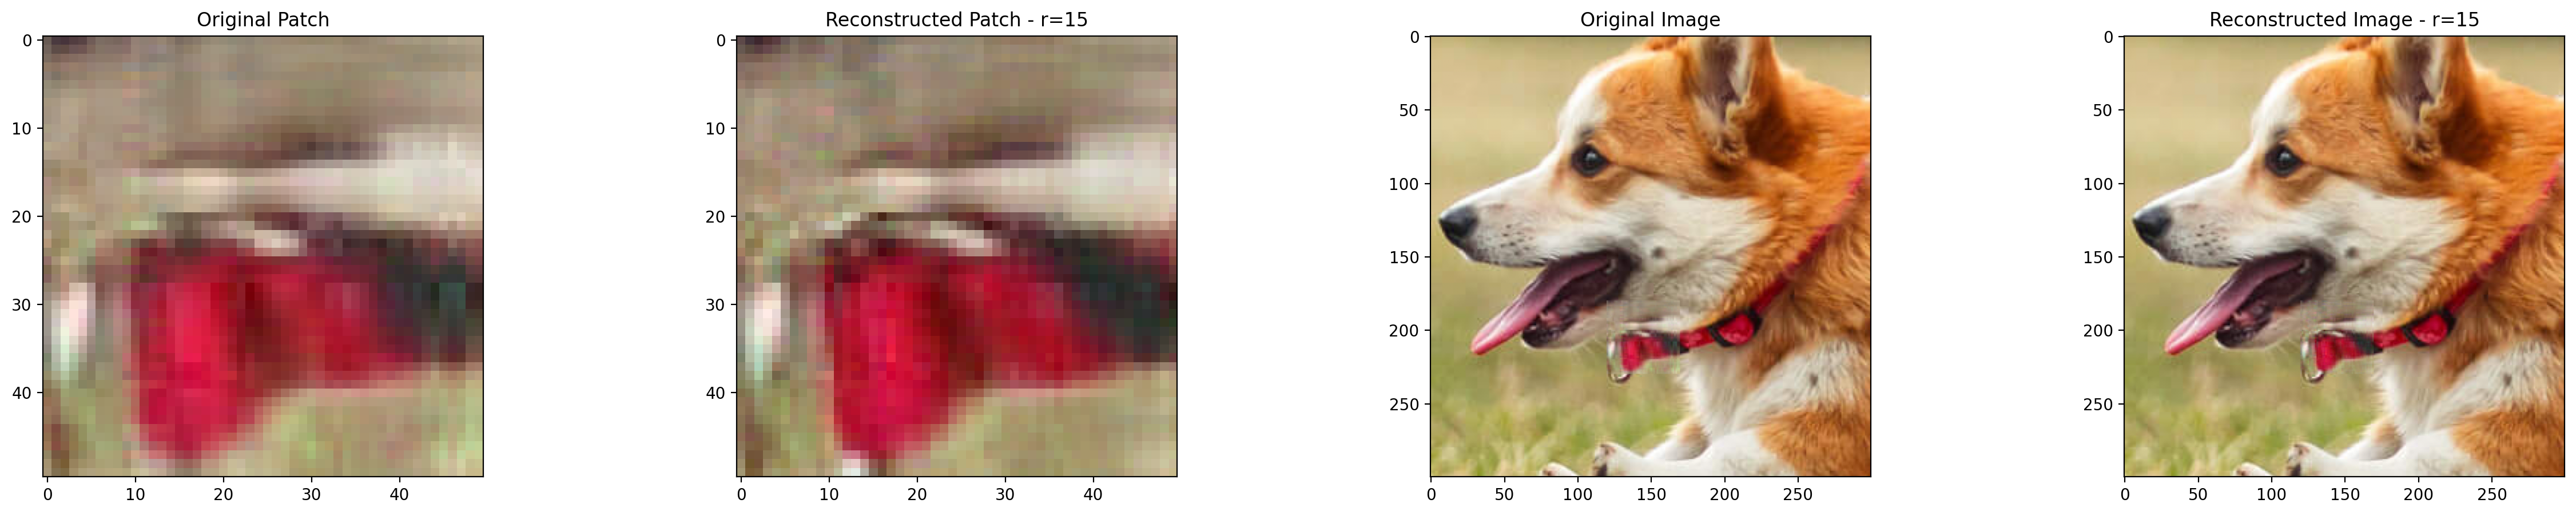


Low-rank approximation with r = 20
RMSE for r = 20: 0.0285
PSNR for r = 20: 30.91 dB


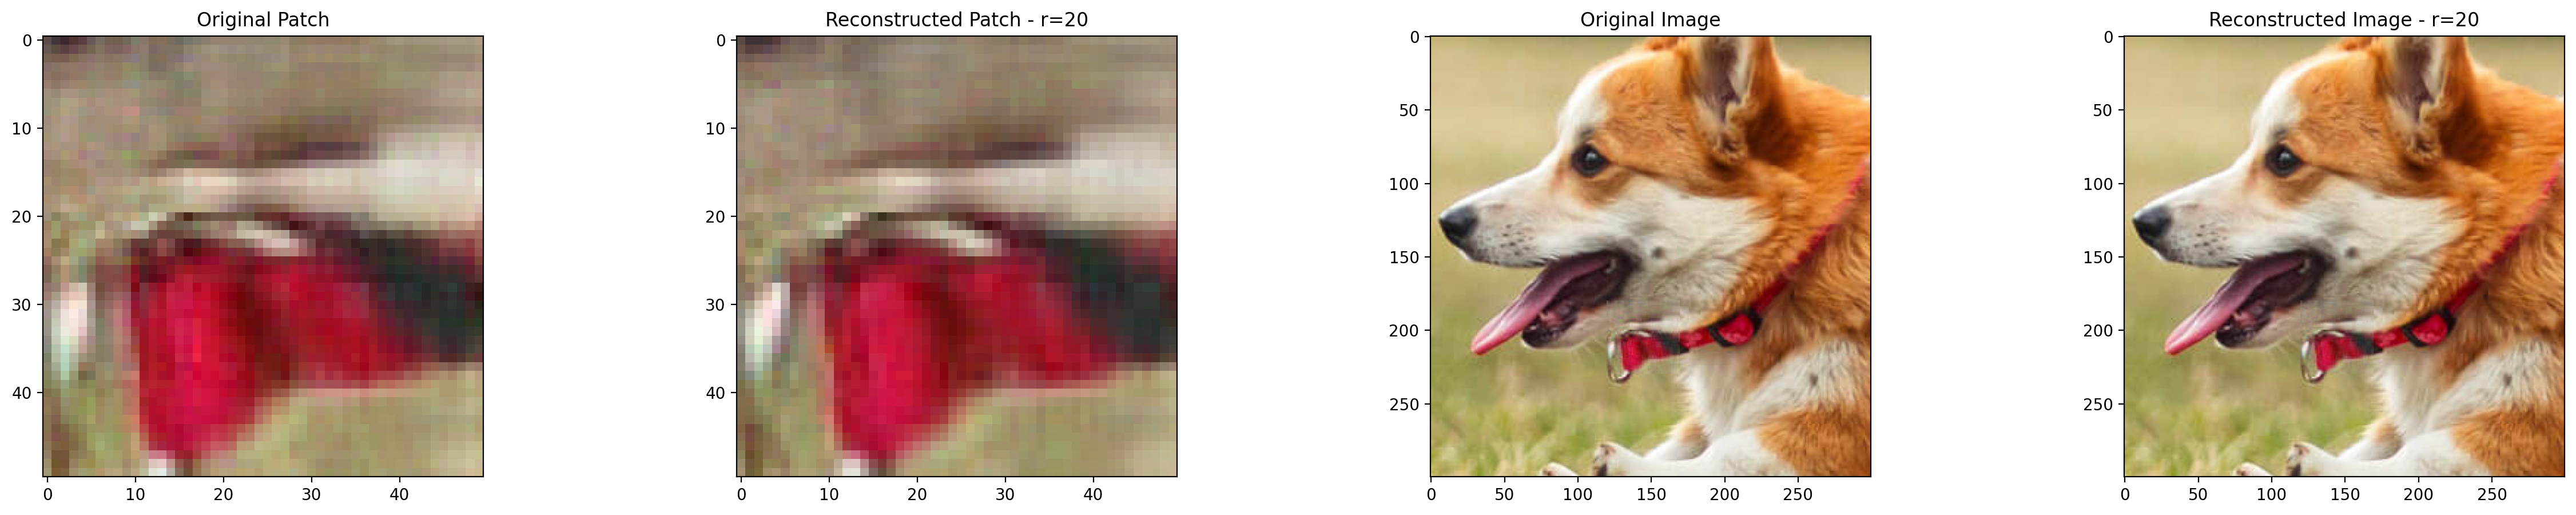


Low-rank approximation with r = 25
RMSE for r = 25: 0.0185
PSNR for r = 25: 34.67 dB


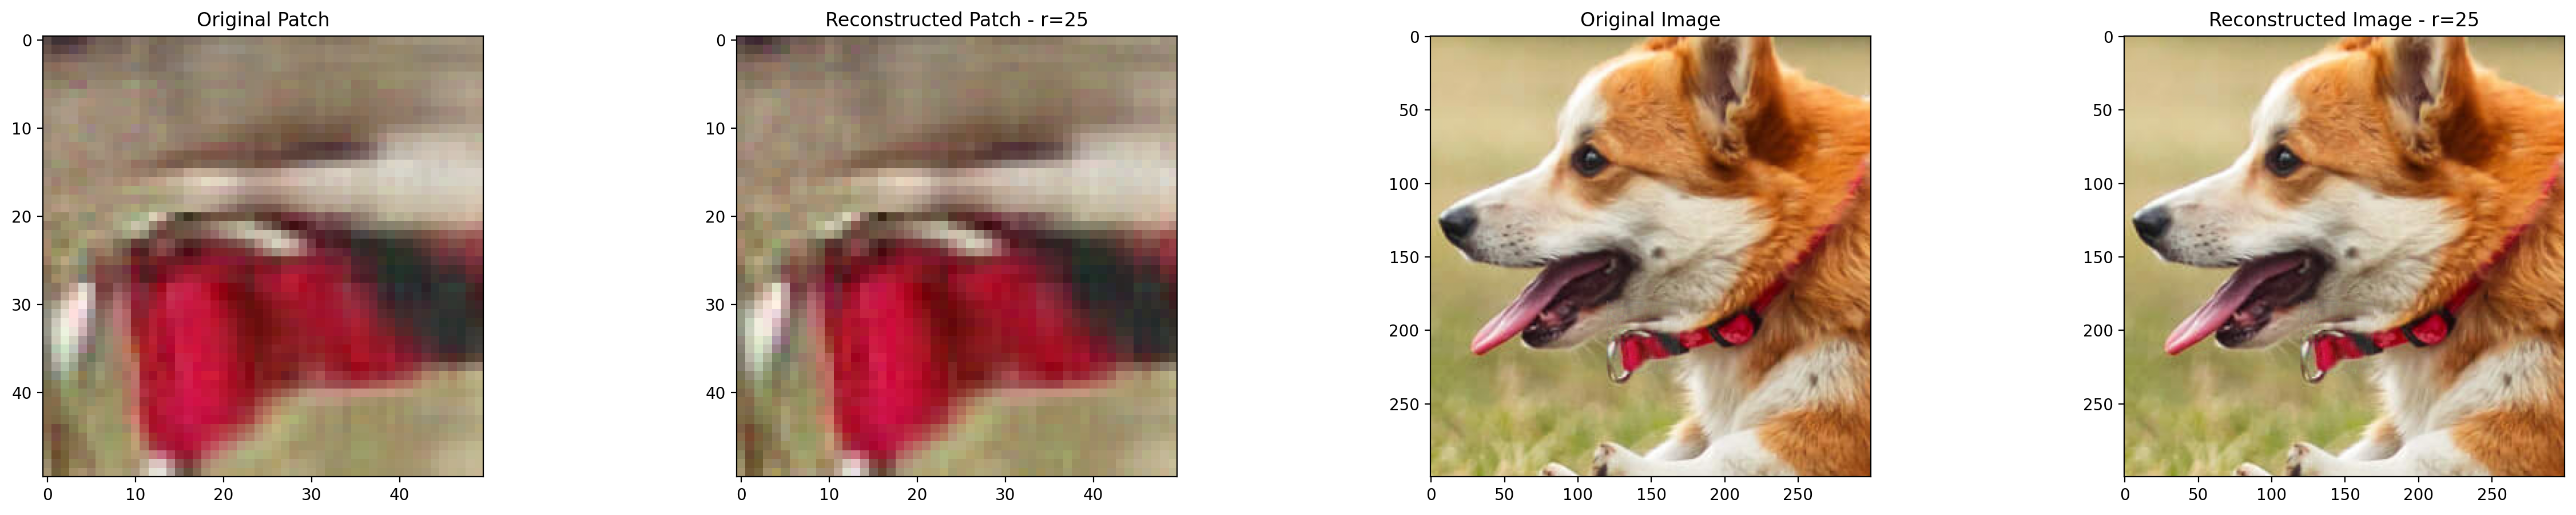

In [ ]:
compress_and_reconstruct(crop,r, [5,10,15,20,25], device=torch.device("cpu"))